<a href="https://colab.research.google.com/github/PaulToronto/DeepLearning-AI---Mathematics-for-Machine-Learning-and-Data-Science/blob/main/2_1_Derivatives_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Derivatives and Optimization

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

## 2.1.1 Derivatives

### 2.1.1.1 Machine Learning Motivation

- Derivatives are used in machine learning to optimize functions
    - In particular, to maximize and minimize them
    - Minimizing a loss function
    - Maximizing a utility function, a reward function or a fitness function

#### Example

In [2]:
houses = pd.DataFrame({'Bedrooms': [1, 2, 3, 5, 6, 7, 8, 10],
                       'Cost': [150_000, 250_000, 350_000, 600_000,
                                650_000, 750_000, 800_000, 1_050_000]})
houses

,Bedrooms,Cost
0,1,150000
1,2,250000
2,3,350000
3,5,600000
4,6,650000
5,7,750000
6,8,800000
7,10,1050000


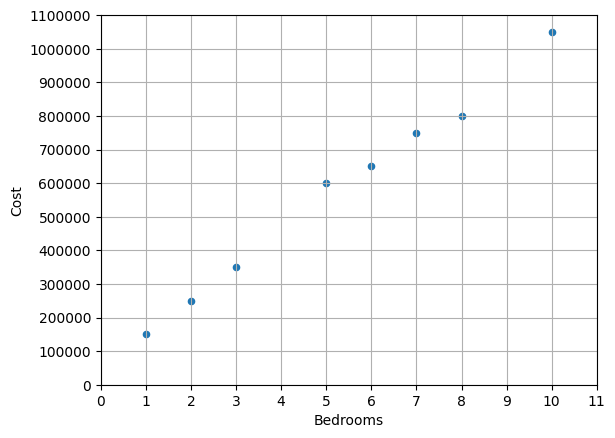

In [3]:
ax = houses.plot.scatter(x='Bedrooms', y='Cost')
ax.ticklabel_format(style='plain', axis='y')
ax.set_xticks(range(0, 12))
ax.set_yticks(range(0, 1_100_001, 100_000))

plt.grid()
plt.show()

- You would like to predict the price of a house using the number of bedrooms it has
- Specifically, you want to estimate the price for a house with 9 bedrooms, so you build a machine learning model to do that
- The **model** is simply the **line of best fit** through the line
    - Training starts with any random line
    - The results are tweaked in each step in order to arrive at the best fit
- This is called a **linear regression** problem


#### Example

- Suppose you meet some aliens. They have spoken to you in their language and each time they spoke, you were able to infer their mood. You don't want to learn their language, but you do want to know if they are happy or sad, based on their utterances.

In [4]:
aliens = pd.DataFrame({'Sentence': ['Aack aack aack!', 'Beep beep!', 'Aack beep aack!', 'Aack beep beep beep!'],
                       'Mood': ['Happy', 'Sad', 'Happy', 'Sad']})
aliens

,Sentence,Mood
0,Aack aack aack!,Happy
1,Beep beep!,Sad
2,Aack beep aack!,Happy
3,Aack beep beep beep!,Sad


- To help us solve this proble, we engineer to features



In [5]:
aliens = pd.DataFrame({'Sentence': ['Aack aack aack!', 'Beep beep!', 'Aack beep aack!', 'Aack beep beep beep!'],
                       'Aack': [3, 0, 2, 1],
                       'Beep': [0, 2, 1, 3],
                       'Mood': ['Happy', 'Sad', 'Happy', 'Sad']})
aliens

,Sentence,Aack,Beep,Mood
0,Aack aack aack!,3,0,Happy
1,Beep beep!,0,2,Sad
2,Aack beep aack!,2,1,Happy
3,Aack beep beep beep!,1,3,Sad


- This is a classification problem
- It is also a **sentiment analysis** model

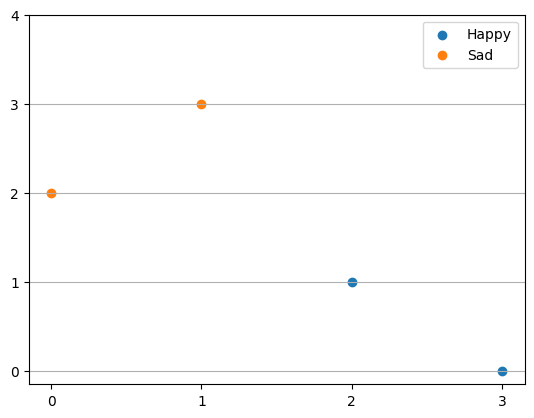

In [6]:
class_names = aliens['Mood'].unique()

for class_name in class_names:
    data = aliens[aliens['Mood'] == class_name]
    plt.scatter(x=data['Aack'], y=data['Beep'], label=class_name)

plt.xticks(range(0, 4))
plt.yticks(range(0, 5))
plt.grid(axis='y')
plt.legend()

plt.show()

- Here, we could also use a line to divide the plain into a "Happy" region and a "Sad" region

#### Math Concepts used in Machine Learning

- Gradients
- Derivatives
- Optimization
- Loss and Cost Functions
- Gradient Descent
- Linear Regression
- Classification
- and many more ...

### 2.1.1.2 Motivation to Derivatives

- Suppose you are in a car traveling at 100 km/hour in a direction, that's **velocity**
- That's an average, but typically, you slow down, speed up, slow down
- But what about the velocity at an instant? That is called **instantaneous velocity**
- That is precisely what a derivative is
- A **derivative** is the instantaneous rate of change of a function

In [7]:
distance = pd.DataFrame({
    't_seconds': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
    'x_metres': [0, 36, 122, 202, 265, 351, 441, 551, 591, 716, 816, 900, 1000]
})

distance

,t_seconds,x_metres
0,0,0
1,5,36
2,10,122
3,15,202
4,20,265
5,25,351
6,30,441
7,35,551
8,40,591
9,45,716


- This car is not moving at a constant speed

In [8]:
distance['delta_metres'] = distance['x_metres'] - distance['x_metres'].shift(1)
distance.set_index('t_seconds', inplace=True)
distance

,x_metres,delta_metres
t_seconds,,
0,0,NaN
5,36,36.0
10,122,86.0
15,202,80.0
20,265,63.0
25,351,86.0
30,441,90.0
35,551,110.0
40,591,40.0


- Can you use what information you have to determine the velocity at `t = 12.5` seconds?
    - No, we can only get the average velocity betwen 10 and 15 seconds which is `16m/s`

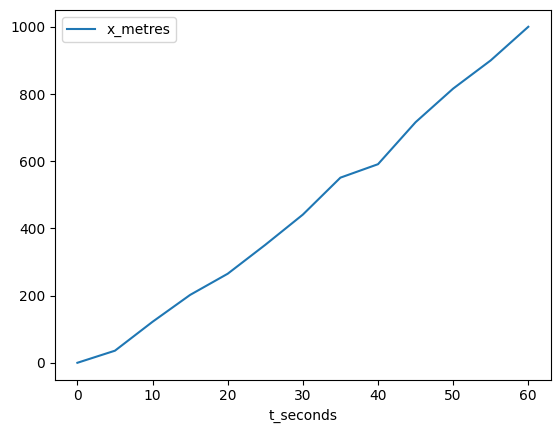

In [9]:
distance.plot(use_index=True, y='x_metres');

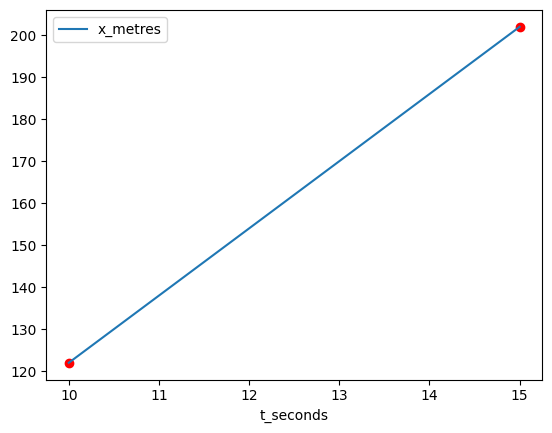

In [10]:
distance.loc[10:15, :].plot(use_index=True, y='x_metres')
plt.scatter(x=distance.loc[10:15, :].index, y=distance.loc[10:15, 'x_metres'], color='red');

- The average velocity between 10 and 15 seconds is the **slope**

In [11]:
delta_distance = distance.loc[15, 'x_metres'] - distance.loc[10, 'x_metres']
delta_time = 15 - 10
delta_distance, delta_time

(80, 5)

In [12]:
slope = delta_distance/delta_time
slope # m/s

16.0

- Supposed we have more refined measurements

In [13]:
distance = pd.DataFrame({
    't_seconds': range(10, 21),
    'x_metres': [122, 138, 155, 170, 186, 202, 218, 234, 250, 265, 265]
})

distance

,t_seconds,x_metres
0,10,122
1,11,138
2,12,155
3,13,170
4,14,186
5,15,202
6,16,218
7,17,234
8,18,250
9,19,265


- Now we can get a better estimate of the velocity at `t = 12.5` seconds

In [14]:
delta_distance = (distance.loc[distance['t_seconds'] == 13, 'x_metres'].values[0] -
                  distance.loc[distance['t_seconds'] == 12, 'x_metres'].values[0])
delta_time = 13 - 12

delta_distance/delta_time #m/s

15.0

- We still don't have the exact velocity at `t = 12.5` seconds
- We need the derivative for that

### 2.1.1.3 Derivatives and Tangents

The derivative at a point is the slope of the tangent line at that point.

$$
\dfrac{dy}{dx} = \lim_{\Delta{x} \to 0}\frac{f\left(x + \Delta{x}\right) - f\left(x\right)}{\Delta{x}}
$$

### 2.1.1.4 Slopes, Maxima and Minima